## Multiple Linear Regression
### Problem statement
Based on various meteorological surveys and people's styles, the service provider of US bike-sharing firm BoomBikes, has gathered a large dataset on daily bike demands across the American market based on some factors. 

Esentially the company wants to know
- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split # For Splitting dataset into train and test dataset
from sklearn.preprocessing import MinMaxScaler # For  Rescaling the training dataset
import statsmodels.api as sm # statsmodels for detail statistical summary
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF calculation
from sklearn.metrics import r2_score #for R-squared

In [3]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Reading and Understanding the Data

In [4]:
rentalbike=pd.read_csv("day.csv")

In [5]:
rentalbike.shape

(730, 16)

- There are 730 rows and 16 columns in the dataset

In [6]:
rentalbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
rentalbike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
246,247,04-09-2018,3,0,9,0,2,1,1,29.075847,33.27145,74.2083,13.833289,2521,2419,4940
448,449,25-03-2019,2,1,3,0,1,1,2,17.937500,21.87440,88.0833,14.791925,1532,3464,4996
468,469,14-04-2019,2,1,4,0,0,0,1,20.295000,24.39980,50.2917,12.791439,2795,4665,7460
283,284,11-10-2018,4,0,10,0,4,1,2,23.233347,27.30480,80.8750,9.583814,667,3896,4563
354,355,21-12-2018,1,0,12,0,5,1,2,17.561653,21.40085,85.8333,14.833800,107,2553,2660


In [8]:
rentalbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- The number of non-null counts = number of total rows so there are no missing values

In [9]:
rentalbike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### We observed that some categorical columns also have numeric values so will repalce all numerical values to string datatype for relevant categories

In [10]:
# Instant is just Sr. no. so dropping the column
rentalbike.drop('instant',axis=1,inplace=True)

## Step 2 : Visualizing the data

- From data dictionary we observed that 
    - atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
    - casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    - temp : temperature in Celsius

- are numeric variables    

#### Visualizing Numeric Variables

In [11]:
rentalbike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

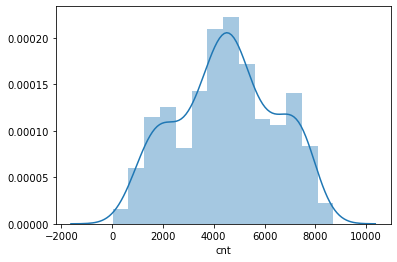

In [12]:
#checking data distribution of cnt
sns.distplot(rentalbike['cnt'])
plt.show()

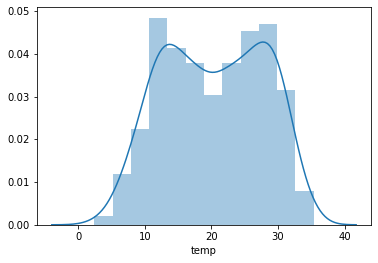

In [13]:
#checking data distribution of temp
sns.distplot(rentalbike['temp'])
plt.show()

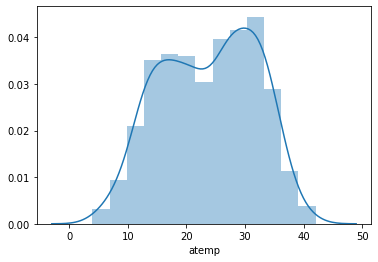

In [14]:
#checking data distribution of atemp
sns.distplot(rentalbike['atemp'])
plt.show()

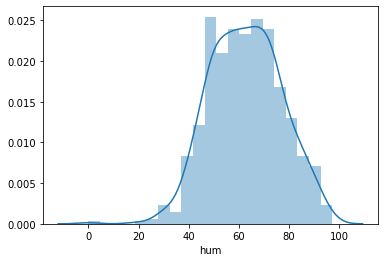

In [15]:
#checking data distribution of hum
sns.distplot(rentalbike['hum'])
plt.show()

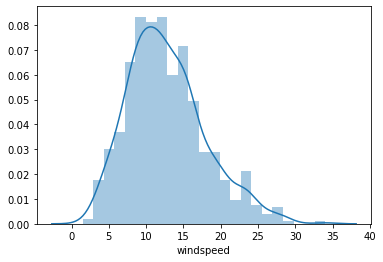

In [16]:
#checking data distribution of windspeed
sns.distplot(rentalbike['windspeed'])
plt.show()

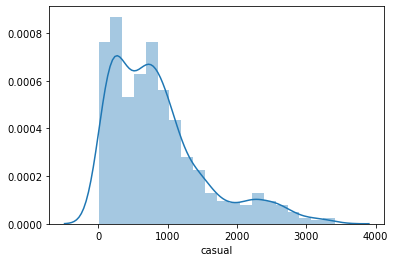

In [17]:
#checking data distribution of casual customers
sns.distplot(rentalbike['casual'])
plt.show()

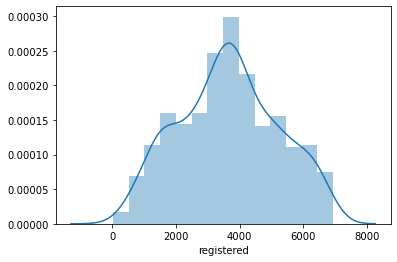

In [18]:
#checking data distribution of registered customers
sns.distplot(rentalbike['registered'])
plt.show()

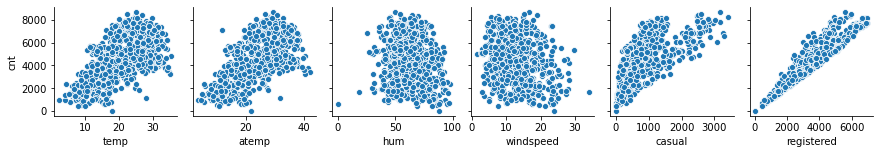

In [19]:
#pairplots for numeric variables
sns.pairplot(data=rentalbike,y_vars='cnt',x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered'],kind='scatter',size=2)
plt.show()

- we can observe following relationships between 'cnt' and :
   - temp      : almost linear
   - atemp     : amlost linear
   - hum       : much scattered data,no realtion
   - windspeed : much scattered data,no realtion
   - casual    : almost linear
   - registered: linear

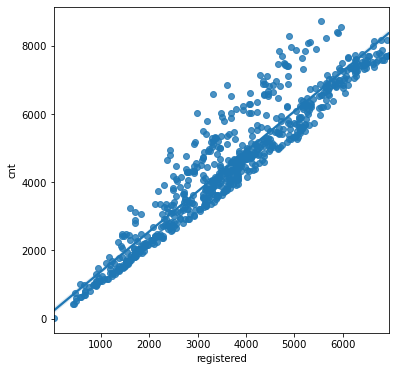

In [20]:
#regression plot for cnt and registered.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='registered',data=rentalbike)
plt.show()

- we can observe that data is hugging the line very closely which is obvious as cnt = registered + casual.

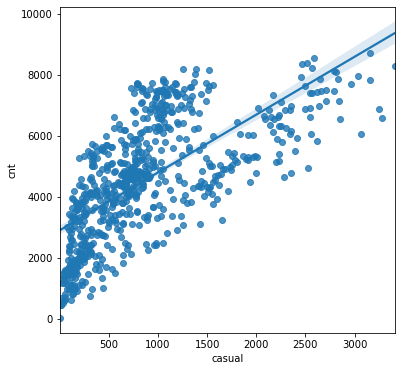

In [21]:
#regression plot for cnt and casual.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='casual',data=rentalbike)
plt.show()

- we can obsereve that as the for lower values and much higher values of cnt casual variable is not very close to the regression line. 
- but cnt = registered + casual.

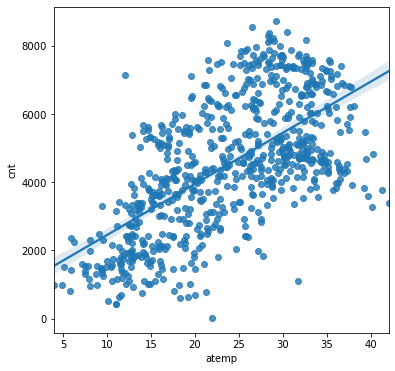

In [22]:
#regression plot for cnt and atemp.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='atemp',data=rentalbike)
plt.show()

- we can onsereve that though almost linear relation can be seen here but data is not hugging the line well.  

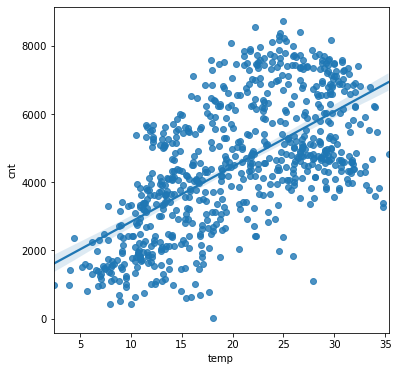

In [23]:
#regression plot for cnt and atemp.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='temp',data=rentalbike)
plt.show()

- we can onsereve that though almost linear relation can be seen here but data is not hugging the line well.  

In [24]:
rentalbike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [25]:
#changing format of dteday
rentalbike['dteday'] = rentalbike['dteday'].astype('datetime64')

- From data dictionary we observed that instant: record index
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : weather situation
    
- are categorical data    

#### Visualizing Categorical Variables

- Converting numeric values to categories

In [26]:
rentalbike.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [27]:
# Checking categories for season 
rentalbike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [28]:
# Assigning category to season : season (1:spring, 2:summer, 3:fall, 4:winter)
def asgn_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
rentalbike['season']=rentalbike['season'].apply(lambda x : asgn_season(x))    

In [29]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


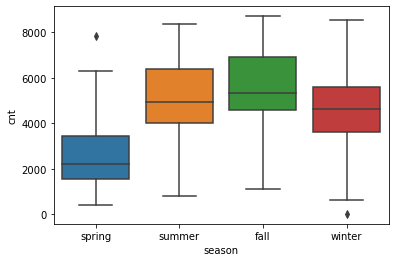

In [30]:
sns.boxplot(x='season',y='cnt',data=rentalbike)
plt.show()

- We can observe that medians of summer, fall and winter are near to each other while spring is very low.
- cnt during spring is low compared to fall and summer

In [31]:
# Assigning category to mnth : month ( 1 to 12)
def asgn_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

rentalbike[['mnth']]=rentalbike[['mnth']].apply(asgn_mnth)    

In [32]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


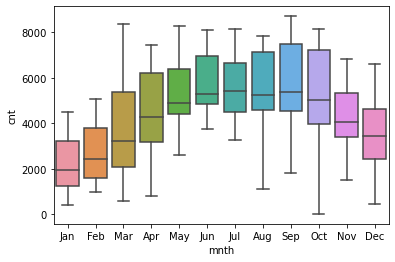

In [33]:
sns.boxplot(x='mnth',y='cnt',data=rentalbike)
plt.show()

- we can observe that from month March to October there is good demand for rental bikes.

In [34]:
#checking weekday
rentalbike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [35]:
# Assigning category to Weekday : day of a week ( 0 to 6)
def asgn_weekday(x):
    return x.map({1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat',
        0:'Sun'})

rentalbike[['weekday']]=rentalbike[['weekday']].apply(asgn_weekday)    

In [36]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,0,Tues,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


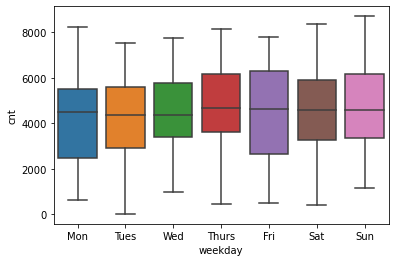

In [37]:
sns.boxplot(x='weekday',y='cnt',data=rentalbike)
plt.show()

- we can observe that data almost overlaps for all categories and medians are also at almost same value of cnt.

In [38]:
#checking values for weathersit
rentalbike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [39]:
# Assigning category to Weathersit :  1: Clear , 2: Mist , 3: Light Snow , 4: Heavy Rain
def asgn_weathersit(x):
    return x.map({1:"Clear", 2: "Mist", 3:"Light Snow", 4:"Heavy Rain"})

rentalbike[['weathersit']]=rentalbike[['weathersit']].apply(asgn_weathersit)   

In [40]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


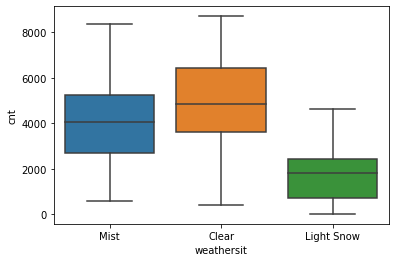

In [41]:
sns.boxplot(x='weathersit',y='cnt',data=rentalbike)
plt.show()

- We can observe that during Light Snow cnt is very low.

In [42]:
rentalbike.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [43]:
rentalbike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [44]:
# Numeric columns 
numcols=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

In [45]:
# Checking correlation of numeric columns
rentalbike[numvars].corr()

NameError: name 'numvars' is not defined

In [ ]:
# To check correlation plotting the heat map
sns.heatmap(rentalbike[numcols].corr(),annot=True)
plt.show()

- From the heatmap we can observe that:
  - varible cnt has high correlation with varibles registerd,casual (Also we know, cnt = registered + casual)
  - variable cnt has good positive correlation with temp and atemp 
  - varible cnt has negative correlation with variables hum and windspeed (as value of these varibles increases value of cnt variable decreases)
  
  
  - We can also obsereve that variable temp and variable atemp are highly correlated.(temp is temperature in Celsius and atemp is feeling temperature in Celsius)
  - Also Variables temp and atemp has also good correlation with varibles casual and and registered

#### From visualizing the data we can conclude that we can fit linear model on this dataset.

### Step 3 : Data preparation

  - cnt: count of total rental bikes including both casual and registered so dropping these two columns.

In [46]:
# Dropping casual and registered
rentalbike.drop(['casual','registered'],axis=1,inplace=True)

In [47]:
# Dropping atemp
rentalbike.drop(['atemp'],axis=1,inplace=True)

In [48]:
# Dropping dteday as yr , month nad day has already been stored in season,weekday,holiday,mnth,yr  
rentalbike.drop(['dteday'],axis=1,inplace=True)

In [49]:
rentalbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Data Preparation

### Encoding dummy variables for categorical columns

In [50]:
print(numcols)

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [51]:
# columns for dummy variables
dummycols=['season','mnth','weekday','weathersit']

In [52]:
rentalbike[dummycols]

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tues,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear
...,...,...,...,...
725,spring,Dec,Fri,Mist
726,spring,Dec,Sat,Mist
727,spring,Dec,Sun,Mist
728,spring,Dec,Mon,Clear


In [53]:
# Dummy for season, mnth,weekday and weathersit
df_dummy = pd.get_dummies(rentalbike[dummycols])

In [54]:
#checking shape of dummy dataframe
df_dummy.shape

(730, 26)

In [55]:
# 26 new variables 
df_dummy.head()

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
0,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [56]:
# Dropping varibles for which dummies has been created  
rentalbike.drop(dummycols, axis=1,inplace=True)

In [57]:
# concating rentalbike dataframe with dummy dataframe
rentalbike=pd.concat([rentalbike,df_dummy],axis=1)

In [58]:
rentalbike.shape

(730, 33)

In [59]:
rentalbike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,1,0,0,0,0,0,0,1,0,0


### Step 4 : Splitting the data into training and testing sets

In [60]:
#splitting rentalbike dataframe into train and test dataframes.
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(rentalbike, test_size=0.2, random_state=100)

In [61]:
print(df_train.shape)
print(df_test.shape)

(584, 33)
(146, 33)


### Step 5 : Rescaling the train dataset

In [62]:
scaler=MinMaxScaler()

In [ ]:
rentalbike.columns

In [ ]:
numvars=['temp','hum', 'windspeed']

In [ ]:
#scaling numeric varibles with Min-Max Scaling.
X_train[numvars] = scaler.fit_transform(X_train[numvars])

X_test[numvars] = scaler.transform(X_test[numvars])

In [ ]:
X_train.head()

In [ ]:
X_train.describe()

### Step 6 : Building a linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
print(regressor.intercept_)

In [ ]:
# Predictions

y_pred = regressor.predict(X_test)

In [ ]:
df1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df1

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))